# CLUSTERING ASSIGNMENT

## Assignment Goal: Cluster countries based on the requirement of the helping aid.

  - HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
  - After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.
  - Main Target is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Later suggest the countries which the CEO needs to focus on the most. 

### Importing important python libraries to perform clustering

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from numpy import nan
from numpy import isnan
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the dataset from the folder
df=pd.read_csv(r"C:\Users\Mohit Pathak\Documents\UPGRAD\Clustering\Assignment Clustering\Country-data.csv")

In [3]:
# Checking the dataset
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
# Having a overview of the dataset. Here we see that all of the columns are of datatype float except {"country":"object"} and {"income","gdpp"} as integer.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.gdpp

0        553
1       4090
2       4460
3       3530
4      12200
       ...  
162     2970
163    13500
164     1310
165     1310
166     1460
Name: gdpp, Length: 167, dtype: int64

In [6]:
df.exports

0      10.0
1      28.0
2      38.4
3      62.3
4      45.5
       ... 
162    46.6
163    28.5
164    72.0
165    30.0
166    37.0
Name: exports, Length: 167, dtype: float64

In [7]:
# we have 'exports' value as some percentage of gdpp in dataset . So, converting 'exports' value to original value.
df.exports=(df.exports)*100/df.gdpp      
df.exports

0      1.808318
1      0.684597
2      0.860987
3      1.764873
4      0.372951
         ...   
162    1.569024
163    0.211111
164    5.496183
165    2.290076
166    2.534247
Name: exports, Length: 167, dtype: float64

In [8]:
# we have 'imports' value as some percentage of gdpp in dataset . So, converting 'imports' value to original value.
df.imports=(df.imports)*100/df.gdpp      
df.imports

0      8.119349
1      1.188264
2      0.704036
3      1.215297
4      0.482787
         ...   
162    1.774411
163    0.130370
164    6.122137
165    2.625954
166    2.116438
Name: imports, Length: 167, dtype: float64

In [9]:
# we have 'health' value as some percentage of gdpp in dataset . So, converting 'health' value to original value.
df.health=(df.health)*100/df.gdpp      
df.health

0      1.370705
1      0.160147
2      0.093498
3      0.080737
4      0.049426
         ...   
162    0.176768
163    0.036370
164    0.522137
165    0.395420
166    0.403425
Name: health, Length: 167, dtype: float64

In [10]:
# Checking the statistics of the dataset.
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060    1.441084    0.355765    2.395925   17144.688623   
std     40.328931    1.829798    0.646116    3.738993   19278.067698   
min      2.600000    0.011032    0.002575    0.006670     609.000000   
25%      8.250000    0.273842    0.041148    0.244265    3355.000000   
50%     19.300000    0.733918    0.119816    0.921127    9960.000000   
75%     62.100000    1.878930    0.396947    2.729061   22800.000000   
max    208.000000   12.305389    5.021645   28.318043  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [11]:
# Checking for missing values in the dataset
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [12]:
#df['child_mort']=df['child_mort'].where(pd.notna(df['child_mort']), df['child_mort'].median())
#df['exports']=df['exports'].where(pd.notna(df['exports']), df['exports'].median())
#df['imports']=df['imports'].where(pd.notna(df['imports']), df['imports'].median())
#df['income']=df['income'].where(pd.notna(df['income']), df['income'].median())
#df['inflation']=df['inflation'].where(pd.notna(df['inflation']), df['inflation'].median())
#df['gdpp']=df['gdpp'].where(pd.notna(df['gdpp']), df['gdpp'].median())

In [13]:
# Checking info of the dataset's datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [14]:
#'exports','health','imports,income','inflation','life_expec','total_fer','gdpp'
df['income']=pd.to_numeric(df['income'],downcast='float')
df['gdpp']=pd.to_numeric(df['gdpp'],downcast='float')

In [15]:
# Checking for any Null Values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Dataset check using external library to obtain Hopkin's score
 - This will ensure whether or not our data is eligible for clustering

In [16]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H=0
 
    return H


In [17]:
hopkins(df.drop('country', axis = 1))

0.9617380579313989

### Plotting box plot to check for the Outliers


In [18]:
df.plot.box(subplots=True,figsize = (17,5),fontsize = 8)

child_mort       AxesSubplot(0.125,0.125;0.0731132x0.755)
exports       AxesSubplot(0.212736,0.125;0.0731132x0.755)
health        AxesSubplot(0.300472,0.125;0.0731132x0.755)
imports       AxesSubplot(0.388208,0.125;0.0731132x0.755)
income        AxesSubplot(0.475943,0.125;0.0731132x0.755)
inflation     AxesSubplot(0.563679,0.125;0.0731132x0.755)
life_expec    AxesSubplot(0.651415,0.125;0.0731132x0.755)
total_fer     AxesSubplot(0.739151,0.125;0.0731132x0.755)
gdpp          AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

#### Check the values of variables at different quantiles

In [19]:
df.quantile([.5,.75,.9,.95,.98,.99], axis = 0) 

child_mort   exports    health    imports   income  inflation  \
0.50       19.30  0.733918  0.119816   0.921127   9960.0      5.390   
0.75       62.10  1.878930  0.396947   2.729061  22800.0     10.750   
0.90      100.22  3.837612  0.900559   6.689207  41220.0     16.640   
0.95      116.00  5.337524  1.468650   9.092849  48290.0     20.870   
0.98      145.16  6.721786  2.207222  13.351630  74208.0     25.988   
0.99      153.40  7.762634  3.393829  15.570895  84374.0     41.478   

      life_expec  total_fer     gdpp  
0.50       73.10     2.4100   4660.0  
0.75       76.80     3.8800  14050.0  
0.90       80.40     5.3220  41840.0  
0.95       81.40     5.8610  48610.0  
0.98       82.00     6.4504  66364.0  
0.99       82.37     6.5636  79088.0

#### Capping the values to suitable range

In [20]:
# capping values for each as compared with boxplots and quantile values are:
# exports=7, health=2,imports=15,income=75000,infaltion=25,life_expec= ,total_fer=7,gdpp=60000

q1= df['exports'].quantile(0.98)
q2= df['health'].quantile(0.98)
q3= df['imports'].quantile(0.98)
q4= df['income'].quantile(0.98)
q5= df['inflation'].quantile(0.98)
q6= df['total_fer'].quantile(0.98)
q7= df['gdpp'].quantile(0.98)
df['exports'][df['exports']>= 7] = q1
df['health'][df['health']>= 2] = q2
df['imports'][df['imports']>=15] = q3
df['income'][df['income']>= 75000] = q4
df['inflation'][df['inflation']>=25]=q5
df['total_fer'][df['total_fer']>= 7] = q6
df['gdpp'][df['gdpp']>=60000] = q7

#### Checking the capping result

child_mort       AxesSubplot(0.125,0.125;0.0731132x0.755)
exports       AxesSubplot(0.212736,0.125;0.0731132x0.755)
health        AxesSubplot(0.300472,0.125;0.0731132x0.755)
imports       AxesSubplot(0.388208,0.125;0.0731132x0.755)
income        AxesSubplot(0.475943,0.125;0.0731132x0.755)
inflation     AxesSubplot(0.563679,0.125;0.0731132x0.755)
life_expec    AxesSubplot(0.651415,0.125;0.0731132x0.755)
total_fer     AxesSubplot(0.739151,0.125;0.0731132x0.755)
gdpp          AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

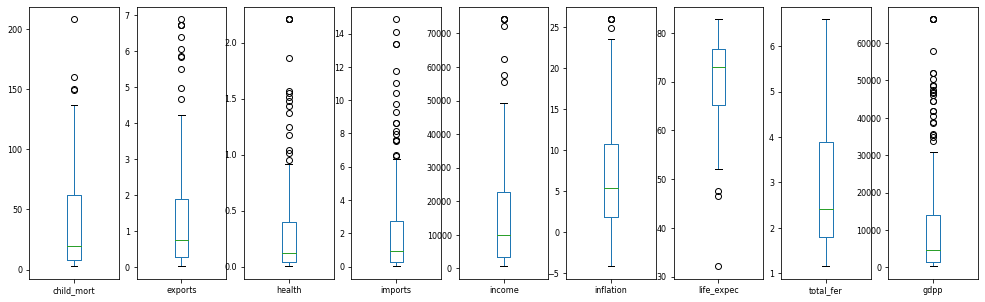

In [21]:
df.plot.box(subplots=True,figsize = (17,5),fontsize = 8)

In [22]:
df.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2  1.808318  1.370705  8.119349   1610.0   
1              Albania        16.6  0.684597  0.160147  1.188264   9930.0   
2              Algeria        27.3  0.860987  0.093498  0.704036  12900.0   
3               Angola       119.0  1.764873  0.080737  1.215297   5900.0   
4  Antigua and Barbuda        10.3  0.372951  0.049426  0.482787  19100.0   

   inflation  life_expec  total_fer     gdpp  
0       9.44        56.2       5.82    553.0  
1       4.49        76.3       1.65   4090.0  
2      16.10        76.5       2.89   4460.0  
3      22.40        60.1       6.16   3530.0  
4       1.44        76.8       2.13  12200.0

#### Scaling the values: Scaling the values will make the variables comparable 

In [23]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238,  0.25597488,  2.20013683, ..., -1.61909203,
         1.92833668, -0.72187203],
       [-0.5389489 , -0.43795818, -0.34226136, ...,  0.64786643,
        -0.86542099, -0.50871936],
       [-0.27283273, -0.32903189, -0.48223653, ...,  0.67042323,
        -0.03466331, -0.48642179],
       ...,
       [-0.37231541,  2.53334608,  0.41798648, ...,  0.28695762,
        -0.66443123, -0.67625241],
       [ 0.44841668,  0.55347546,  0.15185603, ..., -0.34463279,
         1.15787593, -0.67625241],
       [ 1.11495062,  0.70425817,  0.16866762, ..., -2.09278484,
         1.64695101, -0.66721286]])

#### Converting the scaled dataset into dataframe for further analysis

In [24]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532  0.255975  2.200137  1.842711 -0.870777   0.341512   -1.619092   
1   -0.538949 -0.437958 -0.342261 -0.346256 -0.390399  -0.385041    0.647866   
2   -0.272833 -0.329032 -0.482237 -0.499185 -0.218918   1.319056    0.670423   
3    2.007808  0.229146 -0.509037 -0.337719 -0.623082   2.243760   -1.179234   
4   -0.695634 -0.630409 -0.574795 -0.569059  0.139056  -0.832715    0.704258   

   total_fer      gdpp  
0   1.928337 -0.721872  
1  -0.865421 -0.508719  
2  -0.034663 -0.486422  
3   2.156125 -0.542467  
4  -0.543837 -0.019981

## K-Mean Clustering

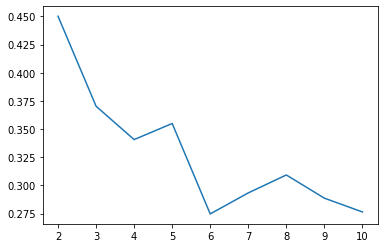

In [25]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

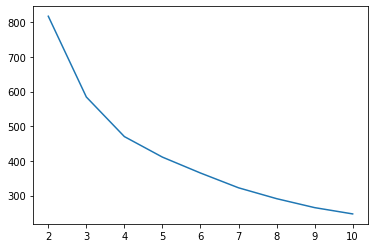

In [26]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [27]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 4, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [28]:
df_kmean = df.copy()

In [29]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

label
0      1
1      0
2      0
3      2
4      0

In [30]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2  1.808318  1.370705  8.119349   1610.0   
1              Albania        16.6  0.684597  0.160147  1.188264   9930.0   
2              Algeria        27.3  0.860987  0.093498  0.704036  12900.0   
3               Angola       119.0  1.764873  0.080737  1.215297   5900.0   
4  Antigua and Barbuda        10.3  0.372951  0.049426  0.482787  19100.0   

   inflation  life_expec  total_fer     gdpp  label  
0       9.44        56.2       5.82    553.0      1  
1       4.49        76.3       1.65   4090.0      0  
2      16.10        76.5       2.89   4460.0      0  
3      22.40        60.1       6.16   3530.0      2  
4       1.44        76.8       2.13  12200.0      0

In [31]:
df_kmean.label.value_counts()

0    77
3    38
2    29
1    23
Name: label, dtype: int64

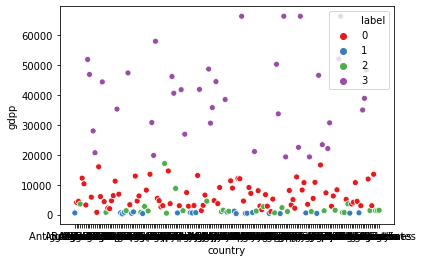

In [32]:
# Plot the cluster
sns.scatterplot(x = 'country', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

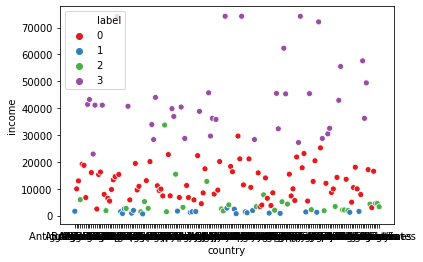

In [33]:
# Plot the cluster
sns.scatterplot(x = 'country', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

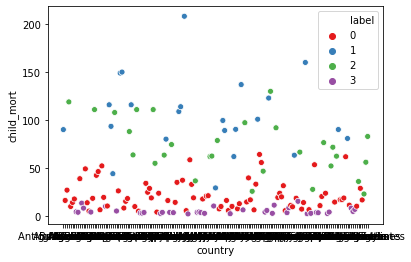

In [34]:
# Plot the cluster
sns.scatterplot(x = 'country', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

### CLUSTER PROFILING

In [35]:
# Making sense out of the clsuters
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

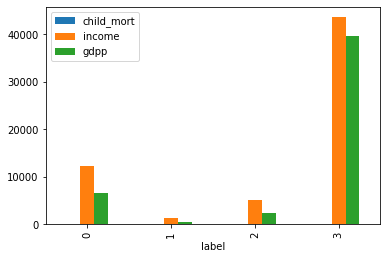

In [36]:
df_kmean.drop(['exports', 'health', 'imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')

In [37]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

df_kmean[df_kmean['label'] == 1]

country  child_mort   exports    health    imports  \
0                 Afghanistan        90.2  1.808318  1.370705   8.119349   
25               Burkina Faso       116.0  3.339130  1.172174   5.147826   
26                    Burundi        93.6  3.861472  2.207222  13.351630   
27                   Cambodia        44.4  6.882952  0.722646   7.569975   
31   Central African Republic       149.0  2.645740  0.892377   5.941704   
32                       Chad       150.0  4.102564  0.505017   4.849498   
37           Congo, Dem. Rep.       116.0  6.721786  2.207222  14.850299   
56                     Gambia        80.3  4.234875  1.012456   7.597865   
63                     Guinea       109.0  4.675926  0.760802   6.666667   
64              Guinea-Bissau       114.0  2.723949  1.553931   6.435101   
66                      Haiti       208.0  2.311178  1.043807   9.773414   
83            Kyrgyz Republic        29.6  5.863636  0.702273   9.284091   
87                    Lesotho        99.7  3.367521  0.948718   8.632479   
88                    Liberia        89.3  5.840979  2.207222  13.351630   
93                 Madagascar        62.2  6.053269  0.912833  10.411622   
94                     Malawi        90.5  4.967320  1.435730   7.603486   
97                       Mali       137.0  3.220339  0.703390   4.957627   
106                Mozambique       101.0  6.721786  1.243437  11.026253   
112                     Niger       123.0  6.379310  1.482759  14.109195   
126                    Rwanda        63.6  2.131439  1.865009   5.328597   
132              Sierra Leone       160.0  4.210526  2.207222   8.646617   
150                      Togo        90.3  6.721786  1.567623  11.741803   
155                    Uganda        81.0  2.873950  1.514286   4.806723   

     income  inflation  life_expec  total_fer    gdpp  label  
0    1610.0       9.44        56.2     5.8200   553.0      1  
25   1430.0       6.81        57.9     5.8700   575.0      1  
26    764.0      12.30        57.7     6.2600   231.0      1  
27   2520.0       3.12        66.1     2.8800   786.0      1  
31    888.0       2.01        47.5     5.2100   446.0      1  
32   1930.0       6.39        56.5     6.5900   897.0      1  
37    609.0      20.80        57.5     6.5400   334.0      1  
56   1660.0       4.30        65.5     5.7100   562.0      1  
63   1190.0      16.10        58.0     5.3400   648.0      1  
64   1390.0       2.97        55.6     5.0500   547.0      1  
66   1500.0       5.45        32.1     3.3300   662.0      1  
83   2790.0      10.00        68.5     3.1000   880.0      1  
87   2380.0       4.15        46.5     3.3000  1170.0      1  
88    700.0       5.47        60.8     5.0200   327.0      1  
93   1390.0       8.79        60.8     4.6000   413.0      1  
94   1030.0      12.10        53.1     5.3100   459.0      1  
97   1870.0       4.37        59.5     6.5500   708.0      1  
106   918.0       7.64        54.5     5.5600   419.0      1  
112   814.0       2.55        58.8     6.4504   348.0      1  
126  1350.0       2.61        64.6     4.5100   563.0      1  
132  1220.0      17.20        55.0     5.2000   399.0      1  
150  1210.0       1.18        58.7     4.8700   488.0      1  
155  1540.0      10.60        56.8     6.1500   595.0      1

In [38]:
df_kmean[df_kmean['label'] == 1].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

country  child_mort   exports    health    imports  income  \
26            Burundi        93.6  3.861472  2.207222  13.351630   764.0   
88            Liberia        89.3  5.840979  2.207222  13.351630   700.0   
37   Congo, Dem. Rep.       116.0  6.721786  2.207222  14.850299   609.0   
112             Niger       123.0  6.379310  1.482759  14.109195   814.0   
132      Sierra Leone       160.0  4.210526  2.207222   8.646617  1220.0   

     inflation  life_expec  total_fer   gdpp  label  
26       12.30        57.7     6.2600  231.0      1  
88        5.47        60.8     5.0200  327.0      1  
37       20.80        57.5     6.5400  334.0      1  
112       2.55        58.8     6.4504  348.0      1  
132      17.20        55.0     5.2000  399.0      1

## In the next section we will do the clustering using Hierarchical clustering

# Heirarchical Clustering 

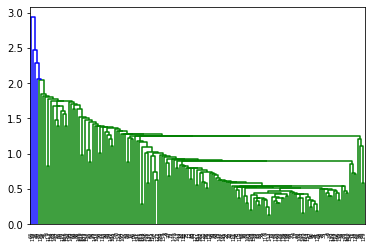

In [39]:
# single linkage
mergings_single = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

#### Insight: For the above single linkage we cannot make any inferences because its view is difficult to dissect and obtain clusters and information. So, let's try plotting it to generate some insights.

In [40]:
# 3 clusters
cluster_labels_single = cut_tree(mergings_single, n_clusters=3).reshape(-1, )
cluster_labels_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
df['cluster_id_H_single'] = cluster_labels_single
df.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2  1.808318  1.370705  8.119349   1610.0   
1              Albania        16.6  0.684597  0.160147  1.188264   9930.0   
2              Algeria        27.3  0.860987  0.093498  0.704036  12900.0   
3               Angola       119.0  1.764873  0.080737  1.215297   5900.0   
4  Antigua and Barbuda        10.3  0.372951  0.049426  0.482787  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id_H_single  
0       9.44        56.2       5.82    553.0                    0  
1       4.49        76.3       1.65   4090.0                    0  
2      16.10        76.5       2.89   4460.0                    0  
3      22.40        60.1       6.16   3530.0                    0  
4       1.44        76.8       2.13  12200.0                    0

In [45]:
df['cluster_id_H_single'].value_counts()

0    165
2      1
1      1
Name: cluster_id_H_single, dtype: int64

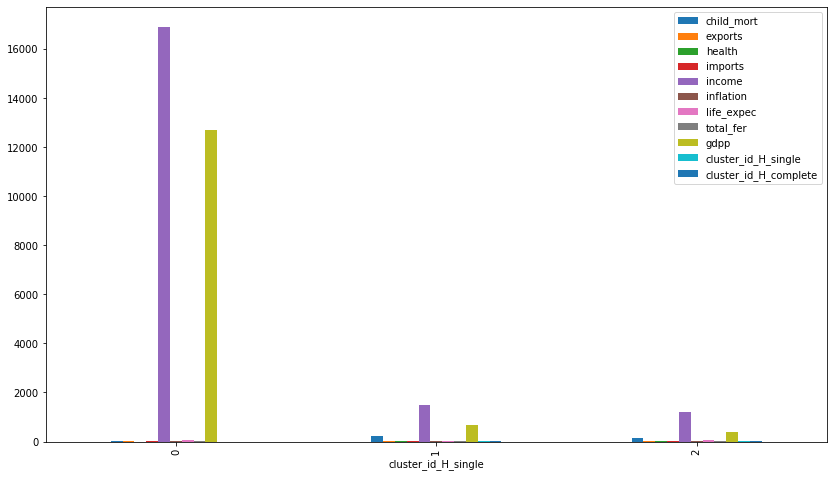

In [48]:
df.drop('country', axis = 1).groupby(df['cluster_id_H_single']).mean().plot(kind = 'bar', figsize= (14,8))
plt.show()

In [56]:
df_single_cluster=df[df['cluster_id_H_single']==2]
df_single_cluster.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True],inplace=True)
help_needed_single=df_single_cluster.head()
help_needed_single.head(5)


country  child_mort   exports    health   imports  income  \
132  Sierra Leone       160.0  4.210526  2.207222  8.646617  1220.0   

     inflation  life_expec  total_fer   gdpp  cluster_id_H_single  \
132       17.2        55.0        5.2  399.0                    2   

     cluster_id_H_complete  
132                      2

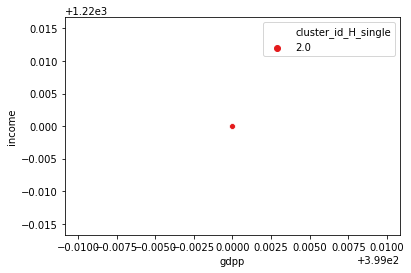

In [57]:
Variance_single_hc_gdp=sns.scatterplot(x = 'gdpp', y = 'income', hue =help_needed_single ['cluster_id_H_single'], data = df, palette = 'Set1')

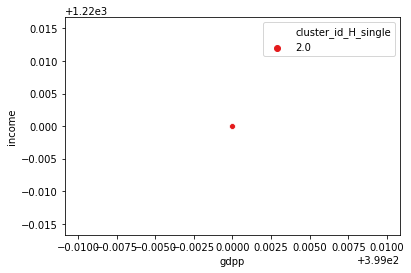

In [58]:
Variance_single_hc_health=sns.scatterplot(x = 'gdpp', y = 'income', hue =help_needed_single ['cluster_id_H_single'], data = df, palette = 'Set1')

### Complete Linkage

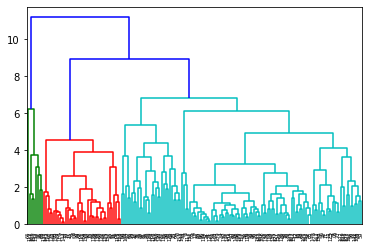

In [41]:
# complete linkage
#Plotting Dendogram
mergings_complete = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [42]:
# 3 clusters
cluster_labels_complete = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels_complete

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [44]:
df['cluster_id_H_complete'] = cluster_labels_complete
df.head()

country  child_mort   exports    health   imports   income  \
0          Afghanistan        90.2  1.808318  1.370705  8.119349   1610.0   
1              Albania        16.6  0.684597  0.160147  1.188264   9930.0   
2              Algeria        27.3  0.860987  0.093498  0.704036  12900.0   
3               Angola       119.0  1.764873  0.080737  1.215297   5900.0   
4  Antigua and Barbuda        10.3  0.372951  0.049426  0.482787  19100.0   

   inflation  life_expec  total_fer     gdpp  cluster_id_H_single  \
0       9.44        56.2       5.82    553.0                    0   
1       4.49        76.3       1.65   4090.0                    0   
2      16.10        76.5       2.89   4460.0                    0   
3      22.40        60.1       6.16   3530.0                    0   
4       1.44        76.8       2.13  12200.0                    0   

   cluster_id_H_complete  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [46]:
# Checking the counts of the 'cluster_id_H_Complete' dataset.
df['cluster_id_H_complete'].value_counts()

0    120
1     39
2      8
Name: cluster_id_H_complete, dtype: int64

In [47]:
df.cluster_id_H_complete

0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Name: cluster_id_H_complete, Length: 167, dtype: int32

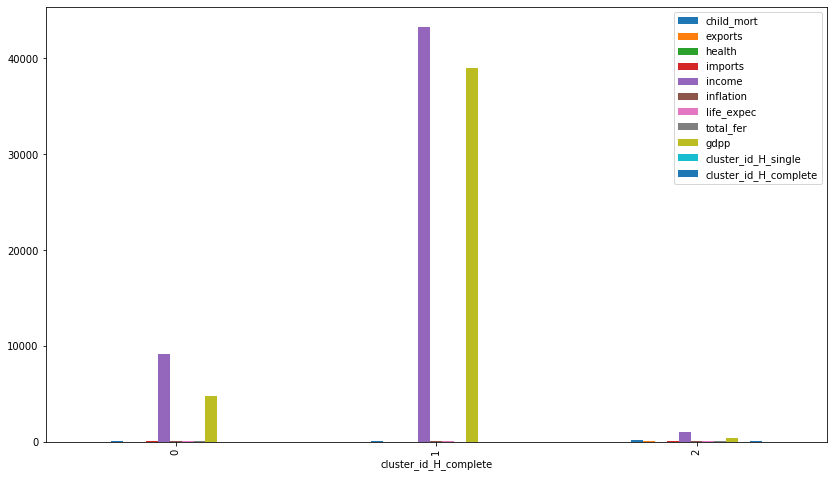

In [52]:
# Plotting the graph to generate the view to know which cluster is to be focussed. Example in below plot we need to focus on cluster 2.
df.drop('country', axis = 1).groupby(df['cluster_id_H_complete']).mean().plot(kind = 'bar', figsize= (14,8))
plt.show()

In [59]:
# Tracing out the companies which are top 5 in the cluster 2.
df_complete_cluster=df[df['cluster_id_H_complete']==2]
df_complete_cluster.sort_values(by=['gdpp','child_mort','income'],ascending=[True,False,True],inplace=True)
help_needed_complete=df_complete_cluster.head(5)
help_needed_complete.head()


country  child_mort   exports    health    imports  income  \
26            Burundi        93.6  3.861472  2.207222  13.351630   764.0   
88            Liberia        89.3  5.840979  2.207222  13.351630   700.0   
37   Congo, Dem. Rep.       116.0  6.721786  2.207222  14.850299   609.0   
112             Niger       123.0  6.379310  1.482759  14.109195   814.0   
132      Sierra Leone       160.0  4.210526  2.207222   8.646617  1220.0   

     inflation  life_expec  total_fer   gdpp  cluster_id_H_single  \
26       12.30        57.7     6.2600  231.0                    0   
88        5.47        60.8     5.0200  327.0                    0   
37       20.80        57.5     6.5400  334.0                    0   
112       2.55        58.8     6.4504  348.0                    0   
132      17.20        55.0     5.2000  399.0                    2   

     cluster_id_H_complete  
26                       2  
88                       2  
37                       2  
112                      2  
132                      2

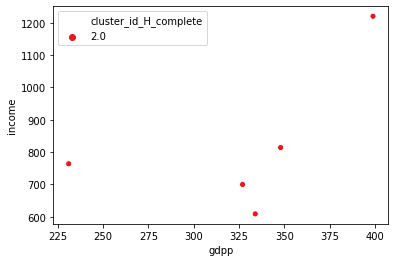

In [60]:
# Plotting variance chart of gdpp vs income.
Variance_complete_hc_gdp=sns.scatterplot(x = 'gdpp', y = 'income', hue = help_needed_complete['cluster_id_H_complete'], data = df, palette = 'Set1')

In [61]:
Variance_complete_hc_health=sns.scatterplot(x = 'child_mort', y = 'health', hue = help_needed_complete['cluster_id_H_complete'], data = df, palette = 'Set1')

## Conclusion:

### Both by K -mean and Hierarchical clustering it is infered that the CEO of HELP International should focus primarily on the following countries. These countries needs the urgent AID:


  - Burundi
  - Liberia
  - Congo, Dem.Rep.
  - Niger
  - Sierra Leone